# 异常检测

In [1]:
pip install pyod

     |████████████████████████████████| 98 kB 288 kB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 548 kB/s eta 0:00:01
  Created wheel for pyod: filename=pyod-0.8.6-py3-none-any.whl size=112144 sha256=975ad9e7f33b34995fbdbae0c75b5cbc900d15a5d53e8641c0a4fd9453397e81
  Stored in directory: /Users/zza/Library/Caches/pip/wheels/94/9b/33/a245c7f9156010196e279d3bac735a47e65f1effb4157df186
  Created wheel for combo: filename=combo-0.1.2-py3-none-any.whl size=42025 sha256=fc7a426cf4eee374564d3d180f674e026e3ecc858b89de401c2317aef251b177
  Stored in directory: /Users/zza/Library/Caches/pip/wheels/40/d4/93/ea2224f96bd2868538da3b8231211c42632221600b080ddf16
  Created wheel for suod: filename=suod-0.0.6-py3-none-any.whl size=2154759 sha256=05ffabe57c701b3c8f7d099c8bc72fd1efc40fcfeafff91e0233741856a805ae
  Stored in directory: /Users/zza/Library/Caches/pip/wheels/70/9e/be/b319e3ee58403b9e71ecb496109ae5bdc4da57aeb472ebe114
Successfully built pyod combo suod
Note: you may need to resta

# 基于统计学的方法

统计学方法对数据的正常性做出假定。**它们假定正常的数据对象由一个统计模型产生，而不遵守该模型的数据是异常点**

统计学方法的有效性高度依赖于对给定数据所做的统计模型假定是否成立。

异常检测的统计学方法的一般思想是：学习一个拟合给定数据集的生成模型，然后识别该模型低概率区域中的对象，把它们作为异常点。即利用统计学方法建立一个模型，然后考虑对象有多大可能符合该模型。

+ 高斯分布 https://blog.csdn.net/chikily_yongfeng/article/details/105750861

## Parametric Method

### 基于正态分布的一元异常点检测（偏理论+用设定阈值判断异常）

仅涉及一个属性或变量的数据称为一元数据。我们假定数据由正态分布产生，然后可以由输入数据学习正态分布的参数，并把低概率的点识别为异常点。

假定输入数据集为${x^{(1)}, x^{(2)}, ..., x^{(m)}}$，数据集中的样本服从正态分布，即$x^{(i)}\sim N(\mu, \sigma^2)$，我们可以根据样本求出参数$\mu$和$\sigma$。

$\mu=\frac 1m\sum_{i=1}^m x^{(i)}$

$\sigma^2=\frac 1m\sum_{i=1}^m (x^{(i)}-\mu)^2$

求出参数之后，我们就可以根据概率密度函数计算数据点服从该分布的概率。正态分布的概率密度函数为

$p(x)=\frac 1{\sqrt{2\pi}\sigma}exp(-\frac{(x-\mu)^2}{2\sigma^2})$

如果计算出来的概率低于某个**设定阈值**，就可以认为该数据点为异常点。

**阈值是个经验值，可以选择在验证集上使得评估指标值最大（也就是效果最好）的阈值取值作为最终阈值**

例如常用的3sigma原则中，如果数据点超过范围$(\mu-3\sigma, \mu+3\sigma)$，那么这些点很有可能是异常点。

这个方法还可以用于可视化。箱线图对数据分布做了一个简单的统计可视化，利用数据集的上下四分位数（Q1和Q3）、中点等形成。异常点常被定义为小于Q1－1.5IQR或大于Q3+1.5IQR的那些数据。

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = np.random.randn(50000) * 20 + 20

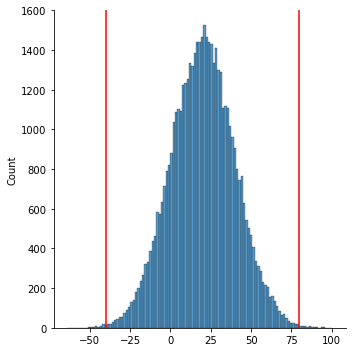

In [26]:
sns.displot(data)
plt.axvline(data.mean() - 3 * data.std(),color='r')
plt.axvline(data.mean() + 3 * data.std(),color='r')

<AxesSubplot:>

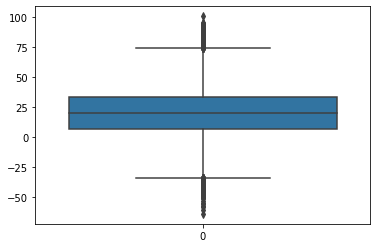

In [27]:
sns.boxplot(data=data)

### 多元异常点检测

涉及两个或多个属性或变量的数据称为多元数据。许多一元异常点检测方法都可以扩充，用来处理多元数据。其核心思想是把多元异常点检测任务转换成一元异常点检测问题。例如基于正态分布的一元异常点检测扩充到多元情形时，可以求出每一维度的均值和标准差。对于第$j$维：

$\mu_j=\frac 1m\sum_{i=1}^m x_j^{(i)}$

$\sigma_j^2=\frac 1m\sum_{i=1}^m (x_j^{(i)}-\mu_j)^2$

计算概率时的概率密度函数为

$p(x)=\prod_{j=1}^n p(x_j;\mu_j,\sigma_j^2)=\prod_{j=1}^n\frac 1{\sqrt{2\pi}\sigma_j}exp(-\frac{(x_j-\mu_j)^2}{2\sigma_j^2})$

这是在各个维度的特征之间相互独立的情况下。如果特征之间有相关性，就要用到多元高斯分布了。

**Gaussian Mixture Model**

- Find the Gaussian distribution parameters like mean and Variance for each cluster and weight of a cluster.
- For each data point, calculate the probabilities of belonging to each of the clusters.

The algorithm train upon these K clusters. Thus given a new data point, the algorithm finds its distance from every distribution & hence the probability of that point belonging to each cluster. Therefore if for a particular cluster, if the probability is very low that’s an indication of the data point being an anomaly.

ref: https://towardsdatascience.com/understanding-anomaly-detection-in-python-using-gaussian-mixture-model-e26e5d06094b

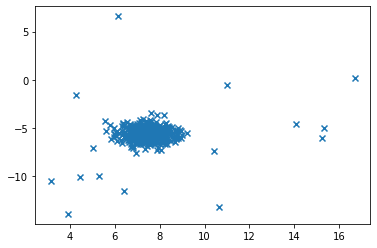

In [30]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=500, centers=1, cluster_std=0.60, random_state=5)
X_append, y_true_append = make_blobs(n_samples=20,centers=1, cluster_std=5,random_state=5)

X = np.vstack([X,X_append])
y_true = np.hstack([y_true, [1 for _ in y_true_append]])

X = X[:, ::-1] 
plt.scatter(X[:,0],X[:,1],marker="x")

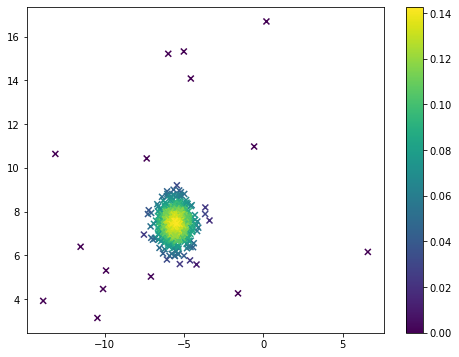

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x",c=p,cmap='viridis');
plt.colorbar();

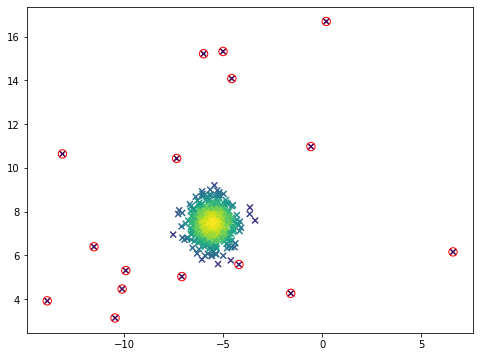

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x",c=p,cmap='viridis')

epsilon=0.02
# Circling of anomalies
outliers = np.nonzero(p<epsilon)[0]
plt.scatter(X[outliers,0],X[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70)

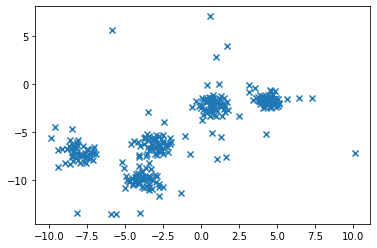

In [51]:
from sklearn.model_selection import train_test_split

X, y_true = make_blobs(n_samples=400, centers=5, cluster_std=0.60, random_state=1)
X_append, y_true_append = make_blobs(n_samples=50,centers=5, cluster_std=5,random_state=1)

X = np.vstack([X,X_append])
y_true = np.hstack([[0 for _ in y_true], [1 for _ in y_true_append]])

X = X[:, ::-1] # flip axes for better plotting
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.33, random_state=1, shuffle=True)
plt.scatter(X_train[:,0],X_train[:,1],marker="x");

In [52]:
def estimateGaussian(X):
    m = X.shape[0]
    #compute mean of X
    sum_ = np.sum(X,axis=0)
    mu = (sum_/m)
    # compute variance of X
    var = np.var(X,axis=0)
    print(mu, var)
    return mu,var

def multivariateGaussian(X,mu,sigma):
    k = len(mu)
    sigma=np.diag(sigma)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma) * X,axis=1))
    return p


[-1.83507767 -5.34263936] [18.71750414 12.12645659]


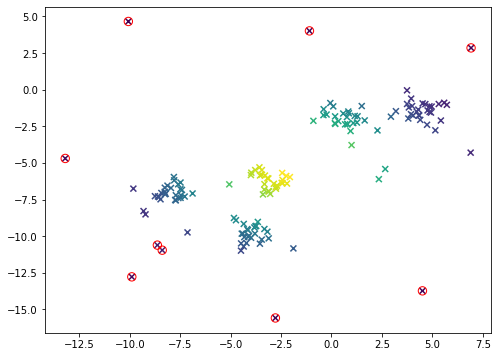

In [54]:
mu, sigma = estimateGaussian(X_train)
p = multivariateGaussian(X_test, mu, sigma)

plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0],X_test[:,1],marker="x",c=p,cmap='viridis');
outliers = np.nonzero(p<0.001)[0]
plt.scatter(X_test[outliers,0],X_test[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70)
# the method does not perform well

In [56]:
# sklearn.mixture.GaussianMixture

from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=0, )
gm.fit(X_train)

GaussianMixture(n_components=5, random_state=0)

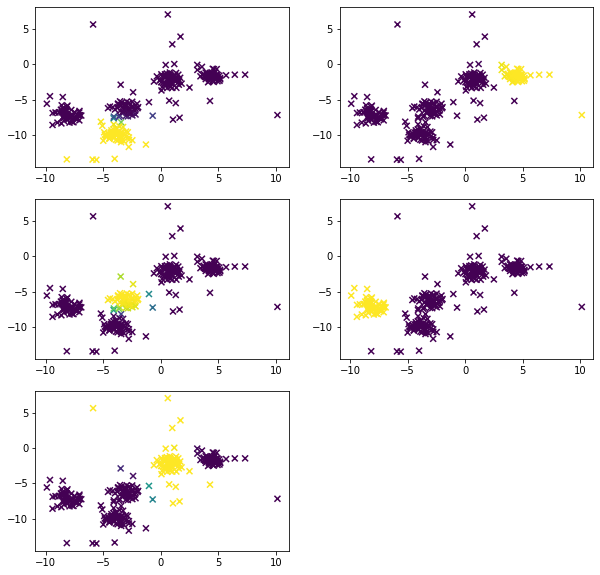

In [57]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,2,i+1)
    plt.scatter(X_train[:,0],X_train[:,1],c=gm.predict_proba(X_train)[:,i],cmap='viridis',marker='x')

## Non-Parametric Method

## Histogram-based Outlier Score(HBOS)

+ 一种单变量方法的组合，不能对特征之间的依赖关系进行建模

+ 其基本假设是数据集的每个维度相互独立。然后对每个维度进行区间(bin)划分，区间的密度越高，异常评分越低。

+ 计算速度较快，对大数据集友好

In [63]:
import os
cwd = os.getcwd()
print(cwd)

/Users/zza/Documents/GitHub/team-learning-data-mining/AnomalyDetection


In [64]:
import pandas as pd
import numpy as np

# Import models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
# reading the big mart sales training data
df = pd.read_csv('/Users/zza/Documents/GitHub/team-learning-data-mining/AnomalyDetection/data/Train.csv')

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

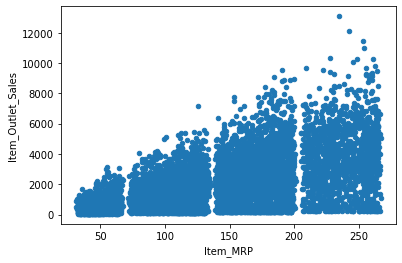

In [65]:
df.plot.scatter('Item_MRP','Item_Outlet_Sales')

In [66]:
# The range of Item Outlet Sales is from 0 to 12000 and Item MRP is from 0 to 250. 
# We will scale down both these features to a range between 0 and 1. 
# This is required to create a explainable visualization (it will become way too stretched otherwise). 
# As for this data, using the same approach will take much more time to create the visualization.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df[['Item_MRP','Item_Outlet_Sales']] = scaler.fit_transform(df[['Item_MRP','Item_Outlet_Sales']])
df[['Item_MRP','Item_Outlet_Sales']].head()

# Store these values in the NumPy array for using in our models later:
X1 = df['Item_MRP'].values.reshape(-1,1)
X2 = df['Item_Outlet_Sales'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)

In [67]:
random_state = np.random.RandomState(42)

outliers_fraction = 0.05

# Define seven outlier detection tools to be compared
classifiers = {
        'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
        'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction)
}

In [69]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager

OUTLIERS :  447 INLIERS :  8076 Angle-based Outlier Detector (ABOD)


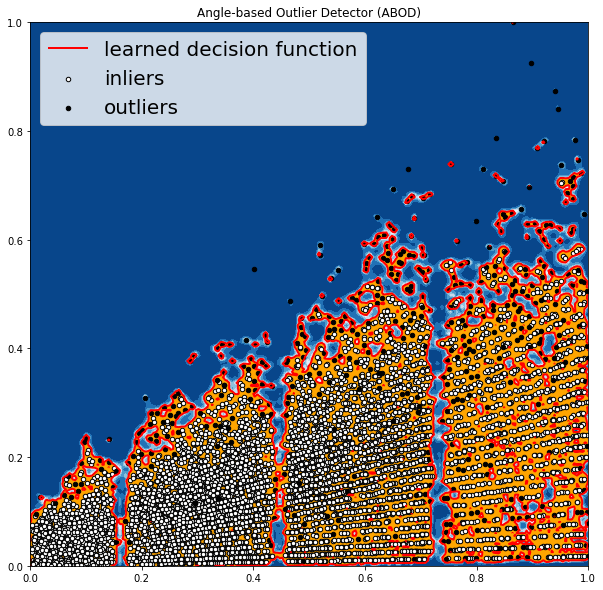

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


OUTLIERS :  427 INLIERS :  8096 Cluster-based Local Outlier Factor (CBLOF)


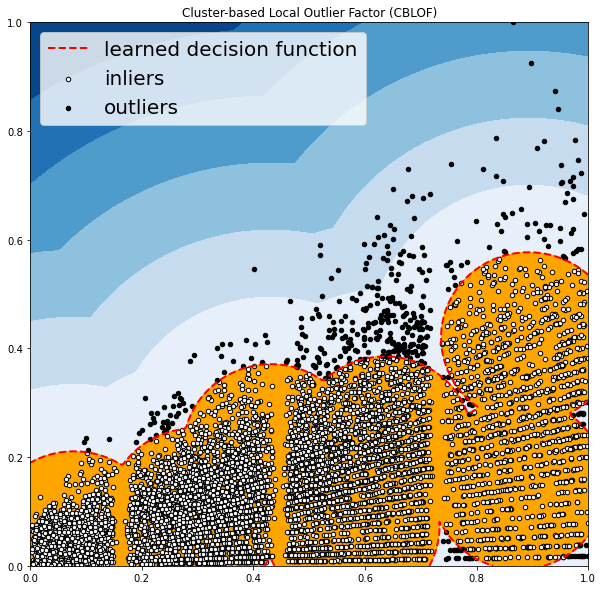

OUTLIERS :  369 INLIERS :  8154 Feature Bagging


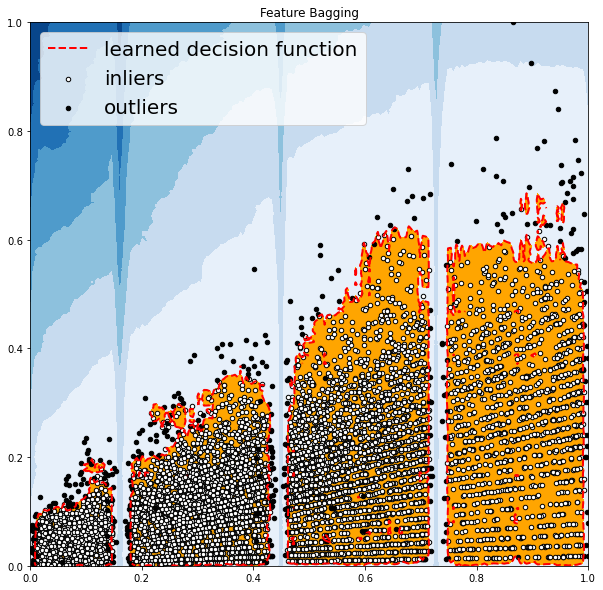

OUTLIERS :  501 INLIERS :  8022 Histogram-base Outlier Detection (HBOS)


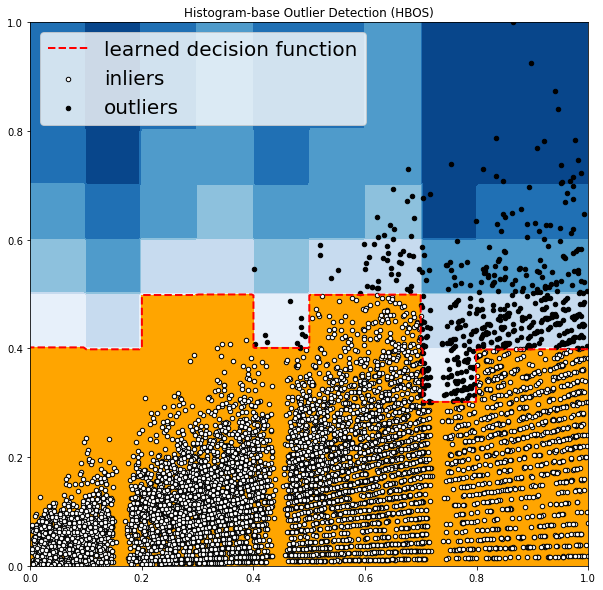

OUTLIERS :  427 INLIERS :  8096 Isolation Forest


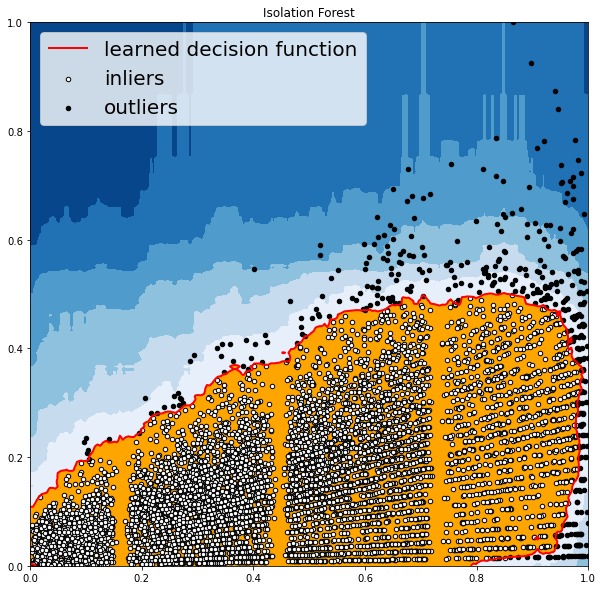

OUTLIERS :  311 INLIERS :  8212 K Nearest Neighbors (KNN)


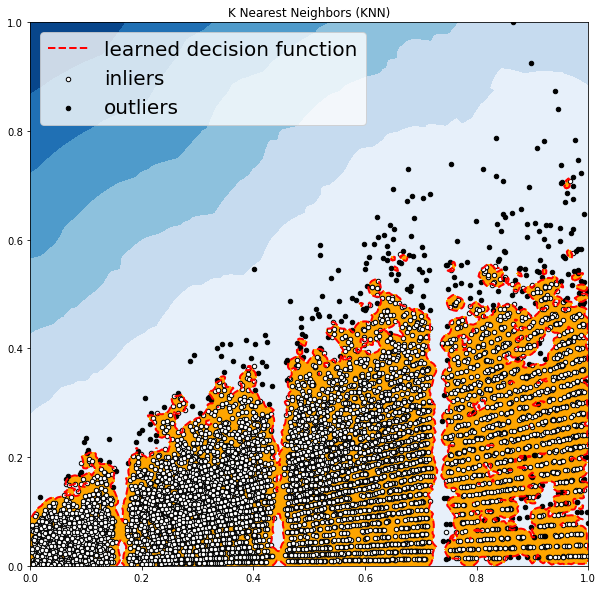

OUTLIERS :  176 INLIERS :  8347 Average KNN


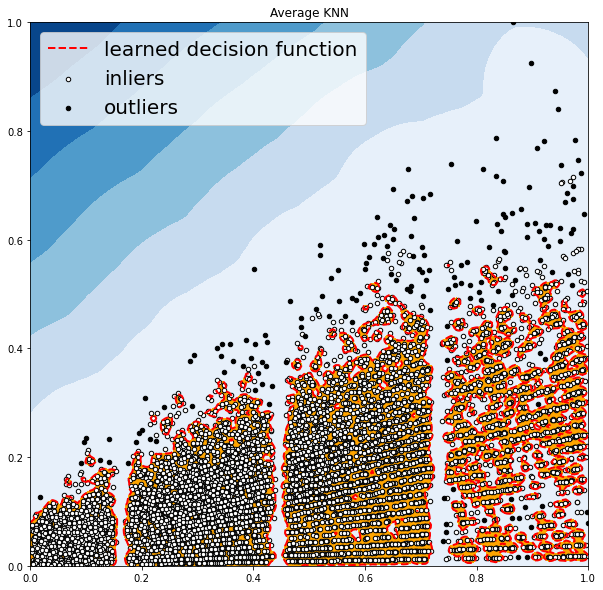

In [70]:
xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
    # copy of dataframe
    dfx = df
    dfx['outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx['Item_MRP'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['Item_Outlet_Sales'][dfx['outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['Item_MRP'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['Item_Outlet_Sales'][dfx['outlier'] == 1].values.reshape(-1,1)
         
    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    plt.show()

# 基于相似度的方法(Proximity-based Model)

## KNN

+ 思路: 对每一个点，计算其与最近k个相邻点的距离，通过距离的大小来判断它是否为离群点。

+ 优点： 简单易懂，实现简单


+ 缺点： 基于邻近度的方法需要O(m2)时间，大数据集不适用；
        对参数的选择敏感；
        
        不能处理具有不同密度区域的数据集，因为它使用全局阈值，不能考虑这种密度的变化；
        
Ref: https://pyod.readthedocs.io/en/latest/example.html

In [1]:
# generate sample data
from pyod.utils.data import generate_data

contamination = 0.1 # percentage of outliers
n_train = 700 # number of training points
n_test = 300 # number of testing points

X_train,y_train,X_test,y_test = generate_data(n_train = n_train,
                                             n_test = n_test,
                                             contamination = contamination)

/opt/anaconda3/lib/python3.8/site-packages/pyod/utils/data.py:185: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  warn('behaviour="old" is deprecated and will be removed '


In [2]:
# import KNN model
from pyod.models.knn import KNN 

# train KNN detector
clf_name ='KNN'
clf = KNN()

# fit the model
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_ # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction labels and outlier scores of the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

y_test_pred_proba = clf.predict_proba(X_test) # the probability of being an outlier

In [20]:
# evaluate the prediction using ROC and Precision @ Rank n
from pyod.utils.data import evaluate_print

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
KNN ROC:0.9998, precision @ rank n:0.9714

On Test Data:
KNN ROC:0.9998, precision @ rank n:0.9667


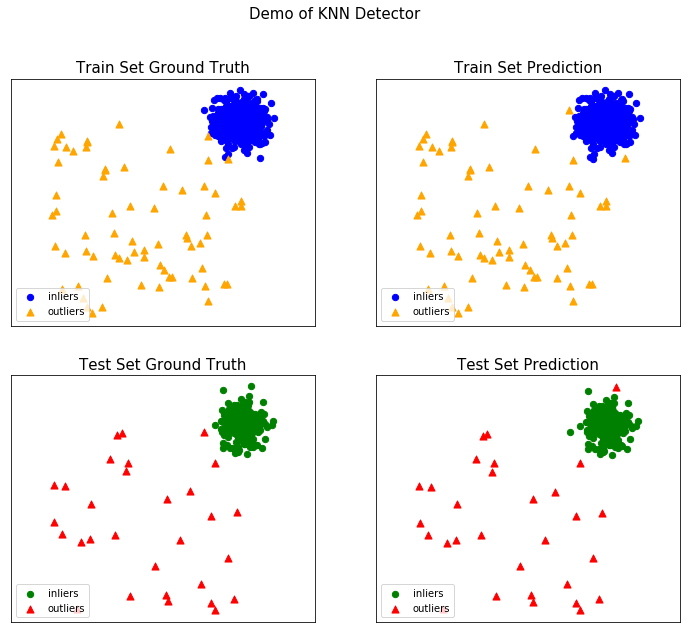

None


In [24]:
# generate the visualizations
from pyod.utils.example import visualize
print(visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False))

# LOF (Local Outlier Factor)

+ 思路: 计算每个点在局部区域上（local region）的密度和其邻域点的密度来判断

+ 优点： 简单易懂，实现简单，比KNN略复杂一点


+ 缺点： 运算开销大，大数据集不适用；
        对参数的选择敏感；
        

In [ ]:
from pyod.models.lof import LOF 

# HBOS